In [1]:
import glob
from os import path

from matplotlib import pyplot as plt
import matplotlib
from policy import CYCLE_COST

In [12]:
timeout = 600
configs = {
    "BestBlind": ("b", "hadd", "Blind", "Blind", "Zero", "random",timeout),
    "SumMin": ("b", "hadd", "SumMin", "Blind", "Zero", "random",timeout),
    "MinSum": ("b", "hadd", "MinSum", "Blind", "Zero", "random",timeout),
    "WorstBlind": ("w", "hadd", "Blind", "Blind", "Zero", "random",timeout),
    "MaxSum": ("w", "hadd", "Blind", "MaxSum", "Zero", "random",timeout),
    "BOAND base": ("bw", "hadd", "MinSum", "MaxSum", "Zero", "random",timeout),
    "BOAND Delta": ("bw", "hadd", "MinSum", "MaxSum", "Delta", "random",timeout),
    "BOAND largestg": ("bw", "hadd", "MinSum", "MaxSum", "Zero", "largestg",timeout),
    "BOAND bw": ("bw", "hadd", "MinSum", "MaxSum", "Delta", "largestg",timeout),
    "BOAND bw2": ("bw", "hadd", "SumMin", "MaxSum", "Delta", "largestg",timeout),
    "BOAND wb": ("wb", "hadd", "MinSum", "MaxSum", "Delta", "largestg",timeout),
    "BOAND wb2": ("wb", "hadd", "SumMin", "MaxSum", "Delta", "largestg",timeout),
    "AND best": ("b", "hadd", "MinSum", "Blind", "Delta", "random",timeout)
}

In [3]:
all_domains = [
        "bream-walk",
        "blocksworld-ex",
        "chain-of-rooms",
        "doors",
        "elevators",
        "frozenlake",
        "islands",
        "mod_first_responders",
        "st_tires",
        "tireworld",
        "tireworld-truck"
    ]

In [4]:
def parse_stats_line(line):
    splitted = line.split(";")
    results = dict()
    results["best"] = int(splitted[0])
    results["worst"] = int(splitted[1])
    results["size"] = int(splitted[2])
    results["time"] = float(splitted[3])
    results["iterations"] = int(splitted[4])
    results["expansions"] = int(splitted[5])
    results["generations"] = int(splitted[6])
    results["max_open"] = int(splitted[7])
    return results

### Comparison of Heuristics

In [15]:
comparisons = [
    ("BestBlind", "SumMin"),
    ("BestBlind", "MinSum"),
    ("SumMin", "MinSum"),
    ("WorstBlind", "MaxSum"),
    ("BOAND bw2", "BOAND bw"),
    ("BOAND wb2", "BOAND wb")
    ]
all_planners = set().union(*comparisons)

criteria = "time"
results = {planner: {domain:[] for domain in all_domains} for planner in all_planners}
non_value = 600
# non_value = 1000000

for planner in all_planners:
    planner_name = "_".join(map(str,list(configs[planner])))
    for domain in all_domains:
        domain_path = f"results/{planner_name}/{domain}"
        path_len = len(domain_path)

        problem_folders = glob.glob(f"{domain_path}/*")
        problem_names = [folder[path_len+1:] for folder in problem_folders]

        for pname in problem_names:
            stats_file = f"{domain_path}/{pname}/solutions/{domain}_{pname}.sol/{pname}.stats"
            result = non_value
            if stats_file in glob.glob(stats_file):
                with open(stats_file, "r") as f:
                    lines = f.readlines()

                stats = [parse_stats_line(line) for line in lines]
                if stats[-1]["best"] == -1:
                    result = stats[-1][criteria]
            
            results[planner][domain] += [result]


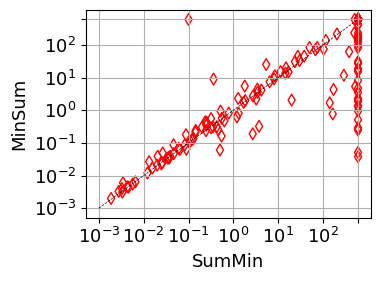

In [16]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.size'] = 13

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.6)
color3 = plt.cm.viridis(.9)

fig, axs = plt.subplots(figsize=(4,3))
# fig.suptitle(criteria)

comparison = comparisons[5]

total = 0
the_max = non_value
for domain in all_domains:
    # print(results[comparison[0]][domain])
    # total += len(results[comparison[0]][domain]) + len(results[comparison[1]][domain])
    # the_max = max([the_max] + results[comparison[0]][domain] + results[comparison[1]][domain])
    axs.scatter(results[comparison[0]][domain], results[comparison[1]][domain], marker='d', edgecolor="red", facecolor="none" )
axs.plot([0.001,600],[0.001,600],c="black",linestyle="--", lw=0.5, alpha=1)
# axs.set_xlabel(comparison[0])
# axs.set_ylabel(comparison[1])
axs.set_xlabel("SumMin")
axs.set_ylabel("MinSum")
axs.set_yscale("log")
axs.set_xscale("log")
axs.xaxis.set_ticks([0.001, 0.01, 0.1, 1, 10, 100, 600])
axs.yaxis.set_ticks([0.001, 0.01, 0.1, 1, 10, 100, 600])
axs.grid()
fig.tight_layout()
# plt.savefig(f"{comparison[0]}_{comparison[1]}.pdf",bbox_inches='tight')
plt.savefig(f"MinSum_SumMin_wb.pdf",bbox_inches='tight')

### Coverage over time (Pareto Coverage Set)

DOMAIN | BOAND bw | BOAND wb | MaxSum | AND best
bream-walk | 8 | 7 | 8 | 8
blocksworld-ex | 9 | 10 | 11 | 8
chain-of-rooms | 8 | 7 | 10 | 2
doors | 7 | 7 | 7 | 7
elevators | 3 | 3 | 6 | 3
frozenlake | 28 | 28 | 29 | 31
islands | 18 | 18 | 21 | 19
mod_first_responders | 9 | 10 | 12 | 10
st_tires | 12 | 11 | 11 | 11
tireworld | 12 | 10 | 9 | 13
tireworld-truck | 10 | 10 | 10 | 10
Total | 124 | 121 | 134 | 122


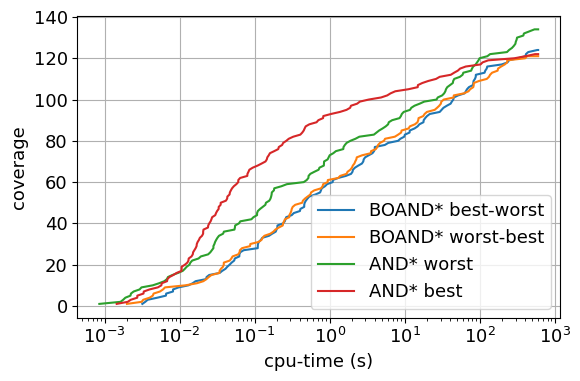

In [11]:
all_planners = [
    "BOAND bw",
    "BOAND wb",
    "MaxSum",
    "AND best",
    ]

criteria = "time"
results = {planner:{domain:[] for domain in all_domains} for planner in all_planners}
for planner in all_planners:
    planner_name = "_".join(map(str,list(configs[planner])))
    for domain in all_domains:
        domain_path = f"results/{planner_name}/{domain}"
        path_len = len(domain_path)

        problem_folders = glob.glob(f"{domain_path}/*")
        problem_names = [folder[path_len+1:] for folder in problem_folders]

        for pname in problem_names:
            stats_file = f"{domain_path}/{pname}/solutions/{domain}_{pname}.sol/{pname}.stats"
            if stats_file in glob.glob(stats_file):
                with open(stats_file, "r") as f:
                    lines = f.readlines()

                stats = [parse_stats_line(line) for line in lines]
                if stats[-1]["best"] == -1:
                    results[planner][domain] += [stats[-1][criteria]]


print("DOMAIN | " + " | ".join(all_planners))
for domain in all_domains:
    print("{} | ".format(domain) + " | ".join(map(str,[len(results[planner][domain]) for planner in all_planners])))
totals = {planner: 0 for planner in all_planners}
for domain in all_domains:
    for planner in all_planners:
        totals[planner] += len(results[planner][domain])
print("Total | "+ " | ".join(map(str,[totals[planner] for planner in all_planners])))


planner_names = {
    "BOAND bw": "BOAND* best-worst",
    "BOAND wb": "BOAND* worst-best",
    "AND best": "AND* best",
    "MaxSum": "AND* worst"
}

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.size'] = 13

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.6)
color3 = plt.cm.viridis(.9)

fig, axs = plt.subplots(figsize=(6,4))

for planner in all_planners:
    planner_results = []
    for domain in all_domains:
        planner_results += results[planner][domain]
    
    planner_results = sorted(planner_results)
    solved = list(range(1, len(planner_results)+1))

    planner_results += [configs[planner][-1]]
    solved.append(solved[-1])

    axs.plot(planner_results, solved, label=planner_names[planner])
# axs.set_title("Coverage over time (Pareto frontier)")
axs.set_ylabel("coverage")
axs.set_xlabel("cpu-time (s)")
axs.set_xscale("log")
axs.legend()
axs.grid()

fig.tight_layout()
plt.savefig("coverage.pdf",bbox_inches='tight')

### Solution quality

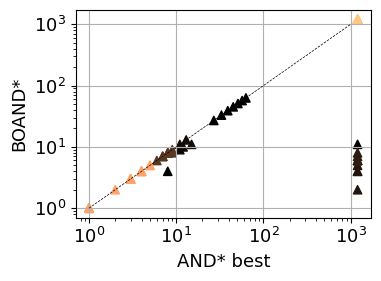

In [66]:
import numpy as np
from policy import CYCLE_COST

def replace_value(x, old_value, new_value):
    if x == old_value:
        return new_value
    else:
        return x
    

bi_objective = "BOAND wb"
single_objective = "MinSum"
criteria = "worst"
# bi_objective = "BOAND bw"
# single_objective = "MaxSum"
# criteria = "best"

comparison = [bi_objective, single_objective]
points = {approach:[] for approach in comparison}

for domain in all_domains:
    planner_name = "_".join(map(str,list(configs[bi_objective])))
    domain_path = f"results/{planner_name}/{domain}"
    path_len = len(domain_path)
    problem_folders = glob.glob(f"{domain_path}/*")
    problem_names = [folder[path_len+1:] for folder in problem_folders]   
    for pname in problem_names:
        psols = dict()
        for planner in comparison:
            planner_name = "_".join(map(str,list(configs[planner])))
            domain_path = f"results/{planner_name}/{domain}"
            stats_file = f"{domain_path}/{pname}/solutions/{domain}_{pname}.sol/{pname}.stats"
            if stats_file in glob.glob(stats_file):
                with open(stats_file, "r") as f:
                    lines = f.readlines()

                stats = [parse_stats_line(line) for line in lines]
                if stats[0]["best"] != -1:
                    psols[planner] = stats[0][criteria]
        
        if all([psols.get(planner, None) is not None for planner in comparison]):
            points[bi_objective].append(psols[bi_objective])
            points[single_objective].append(psols[single_objective])

all_noncycle_values = [value for value in points[bi_objective] + points[single_objective] if value != CYCLE_COST]
# new_cycle_cost = max(all_noncycle_values)*10
new_cycle_cost = 1200


for approach in comparison:
    # CHANGE CYCLE COST
    points[approach] = list(map(lambda x: replace_value(x, CYCLE_COST, new_cycle_cost), points[approach]))


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.size'] = 13

x = np.array(points[single_objective])
y = np.array(points[bi_objective])
nbins = 250
bins = [nbins, nbins] # number of bins
hh, locx, locy = np.histogram2d(x, y, bins=bins)
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
# print(idx)

x2, y2, z2 = x[idx], y[idx], z[idx]

# print(x2)
# print(y2)
# print(z2)

fig, axs = plt.subplots(figsize=(4,3))
axs.scatter(x2, y2, c=z2, cmap=plt.cm.copper, marker='^')  

# axs.hexbin(x, y, gridsize=20, cmap=plt.cm.BuGn_r)
# axs.hist2d(x, y, bins=20, cmap=plt.cm.BuGn_r)

# axs.scatter(points[single_objective], points[bi_objective], marker="o", s=1, c="red")

axs.plot([1,1000],[1,1000],c="black",linestyle="--", lw=0.5, alpha=1)

# axs.set_xlabel(comparison[1])
# axs.set_ylabel(comparison[0])
axs.set_yscale("log")
axs.set_xscale("log")
axs.xaxis.set_ticks([1, 10, 100, 1000])
axs.yaxis.set_ticks([1, 10, 100, 1000])
axs.grid()
# axs.legend()

plt.xlabel("AND* best")
plt.ylabel("BOAND*")
# plt.title("Comparsion of %s case solution quality" % criteria )

fig.tight_layout()
plt.savefig(f"{criteria}.pdf",bbox_inches='tight')